In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle

### Data load 

In [3]:
# Data
df = pd.read_csv('data/df.csv')


### Data exploration

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [26]:
df.head()

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.592219,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.491457,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,1.000000


### Preprocessing

In [4]:
def convert_dataframe(df):
    # Reemplazar valores en blanco o espacios vacíos con NaN
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    # Convertir columnas binarias
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
    df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
    df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
    df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
    df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
    df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
    df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

    # Convertir columnas categóricas con One-Hot Encoding
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

    # Eliminar columnas no numéricas o innecesarias
    df = df.drop(columns=['customer_id'])

    # Asegurarse de que todas las columnas sean numéricas
    df = df.apply(pd.to_numeric, errors='coerce')

    # Eliminar filas con valores NaN
    df.dropna(inplace=True)

    return df

# Cargar el dataframe completo
df = pd.read_csv('data/df.csv') 

# Convertir los datos (limpiar y transformar)
df_final = convert_dataframe(df)

In [5]:
# Dividir en Train y Test csv
dftrain, dftest = train_test_split(df_final, test_size=0.2, random_state=42)

# Guardar los dataframes en archivos CSV
dftrain.to_csv('data/train/train.csv', index=False)
dftest.to_csv('data/test/test.csv', index=False)

In [6]:
dftrain

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,1,0,0,0,43,0,2,0,0,1,...,True,False,False,True,False,False,True,False,False,False
3410,0,0,0,0,3,1,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
5483,1,0,1,0,55,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
5524,0,0,1,1,45,1,0,1,0,0,...,True,False,False,False,False,True,True,False,False,False
6337,1,0,1,1,55,1,1,1,0,0,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0,0,0,3,1,1,0,0,0,...,True,False,False,True,False,False,True,False,False,False
5199,1,0,0,0,51,1,1,0,1,1,...,False,True,False,False,True,False,False,False,True,False
5235,0,0,0,0,9,1,1,1,0,0,...,False,True,False,True,False,False,False,False,True,False
5399,1,0,0,0,50,1,0,2,2,2,...,False,False,True,False,True,False,True,False,False,False


In [8]:
# Separar cvariables predictoras y variable objetivo
X_train = dftrain.drop('Churn', axis=1)
y_train = dftrain['Churn']
X_test = dftest.drop('Churn', axis=1)
y_test = dftest['Churn']

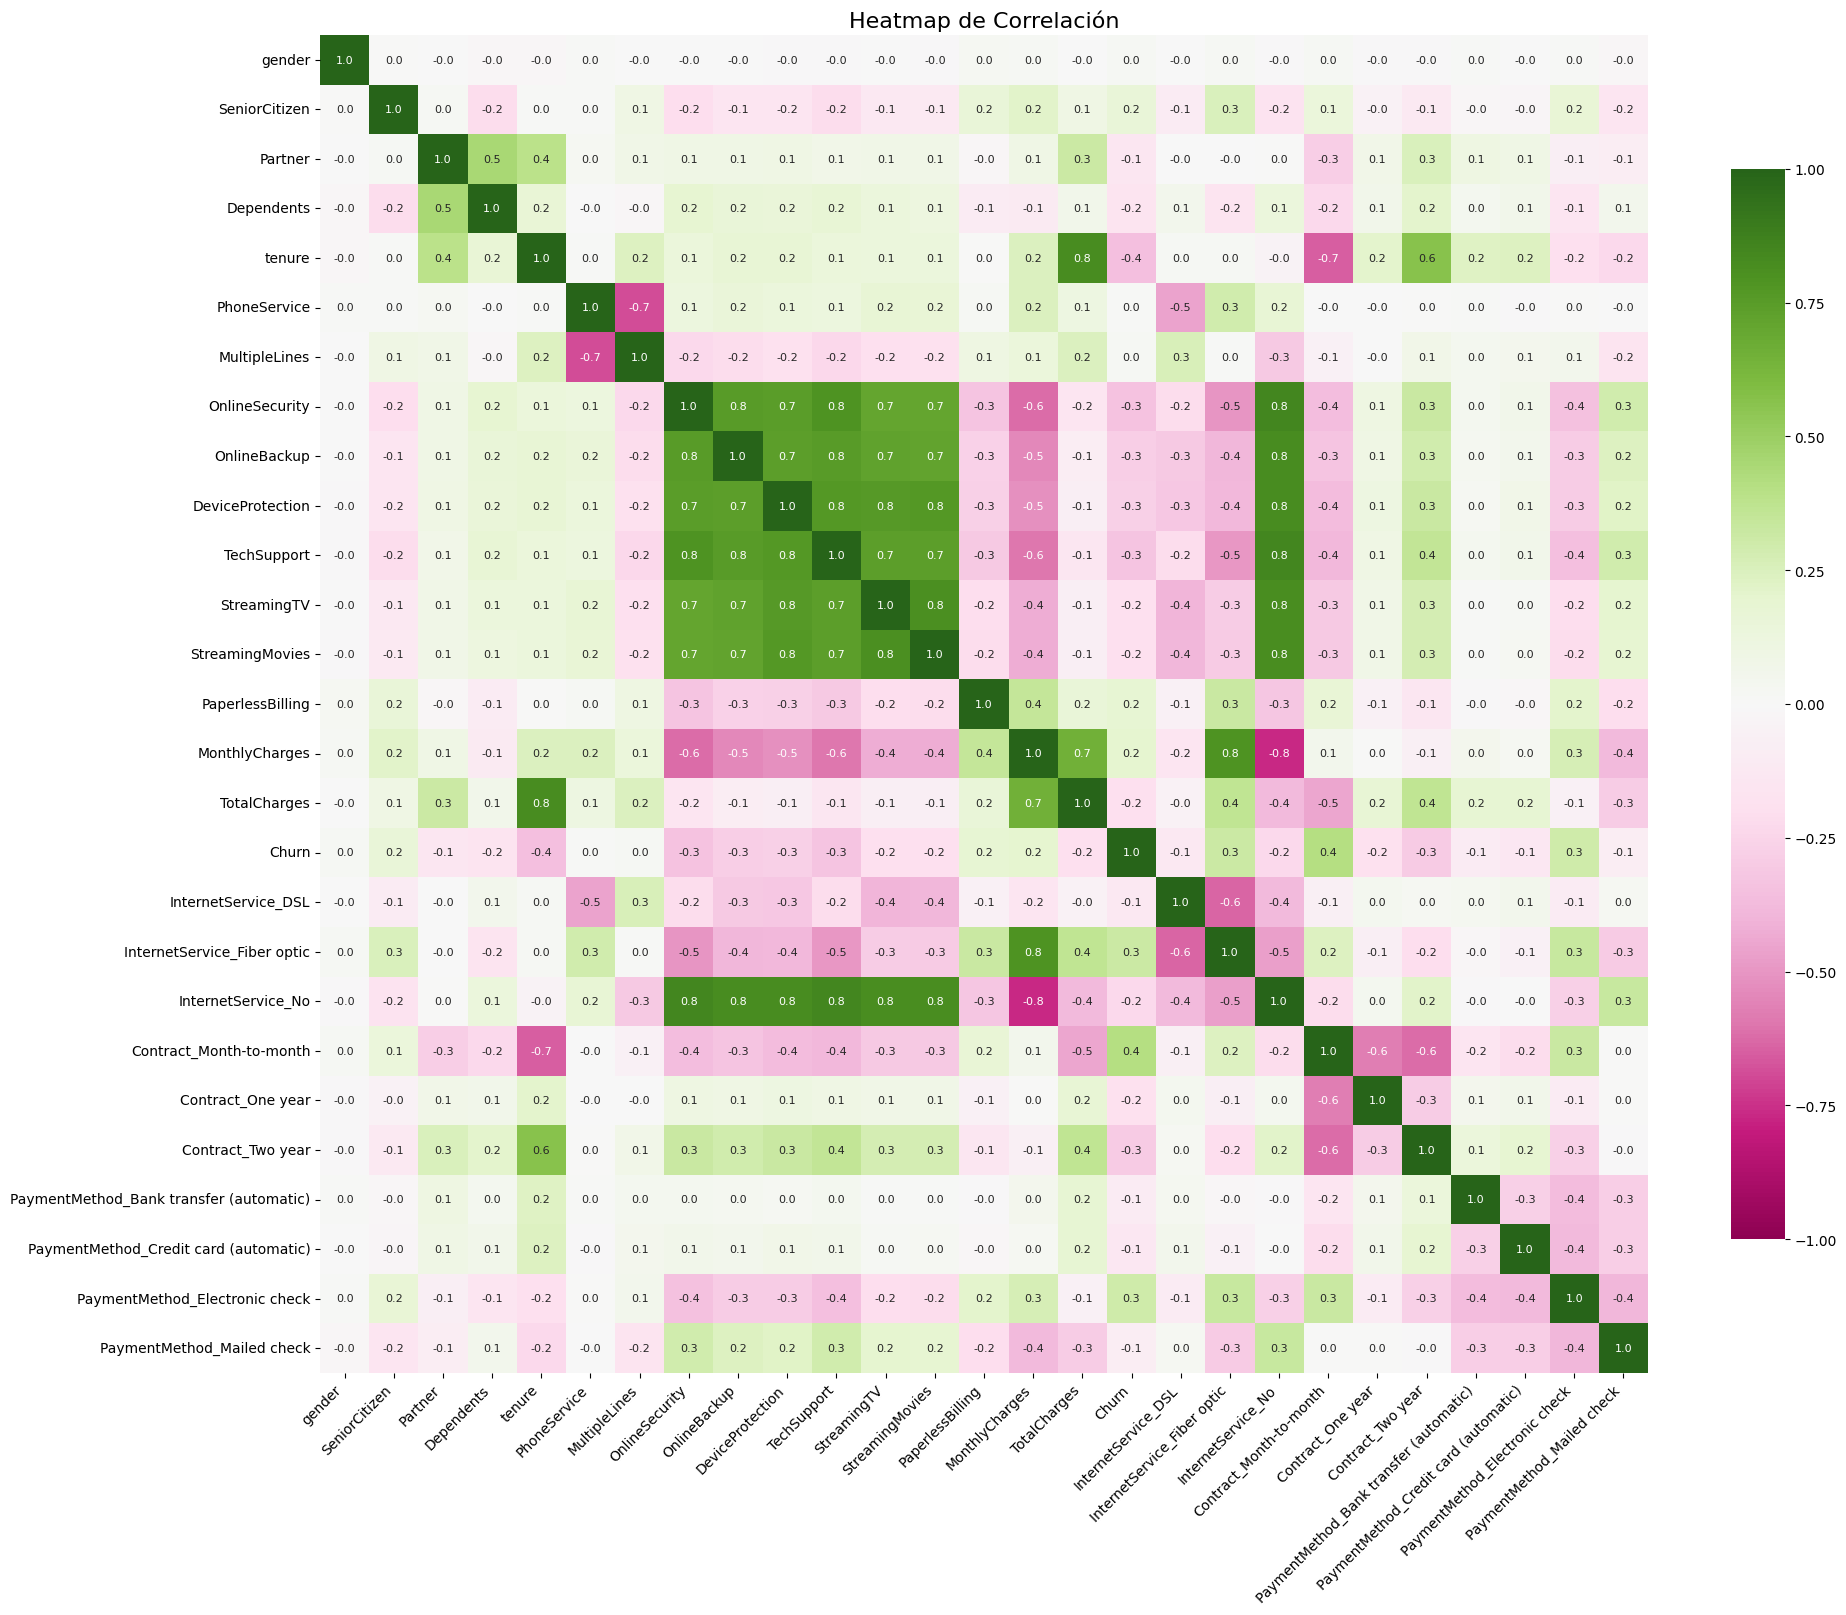

In [12]:
# Calcular la matriz de correlación
corr_matrix = dftrain.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 16))

# Generar el heatmap de correlación
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt='.1f', vmin=-1, vmax=1,
            annot_kws={"size": 8}, cbar_kws={"shrink": .8})

# Rotar las etiquetas para una mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
# Ajustar el diseño para una mejor visibilidad
plt.tight_layout()

plt.title('Heatmap de Correlación', fontsize=16)
plt.show()

### Random Forest

In [31]:
# Modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predecir en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

In [19]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.60      0.46      0.52       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407



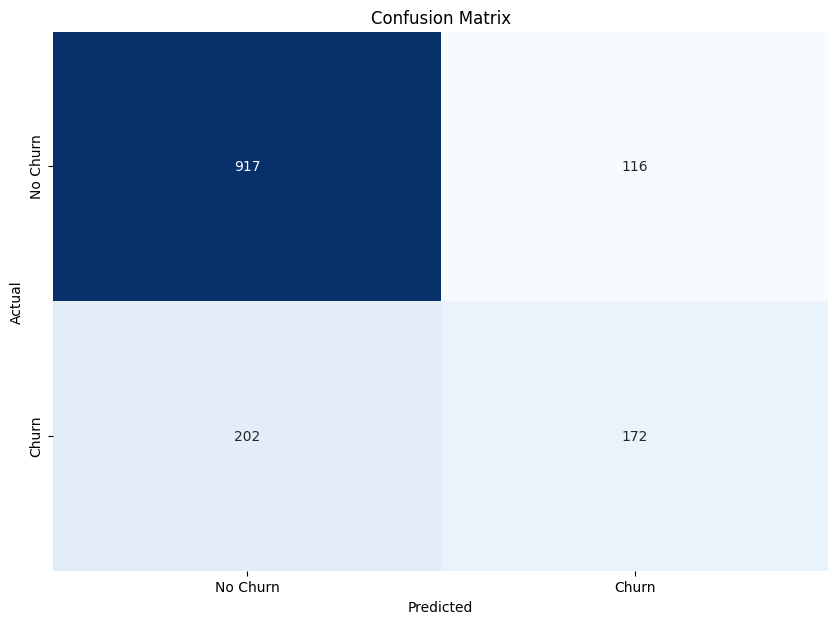

In [23]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting Classifier

In [33]:
# Crear y entrenar el modelo Gradient Boosting
modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [34]:
# Predecir en el conjunto de prueba
y_pred = modelo_gb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



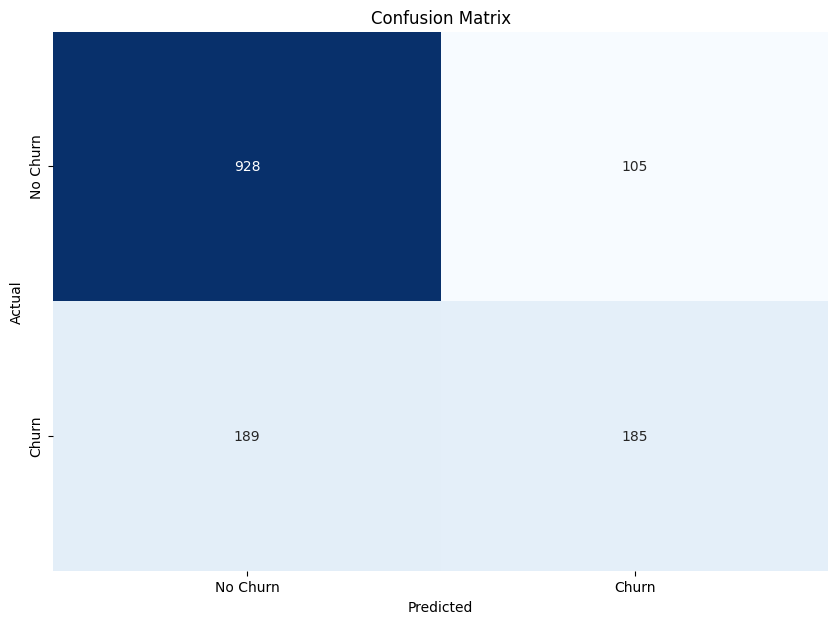

In [35]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### GridSearch para ajustar los hiperparámetros del modelo GradientBoostingClassifier 

In [54]:
# Definir el modelo Gradient Boosting
modelo_gb = GradientBoostingClassifier(random_state=42)

# Definir los hiperparámetros para el GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid = GridSearchCV(modelo_gb, param_grid, scoring='recall', refit=True, verbose=2, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=3

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [55]:
# Predecir en el conjunto de prueba con el mejor modelo
y_pred = grid.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



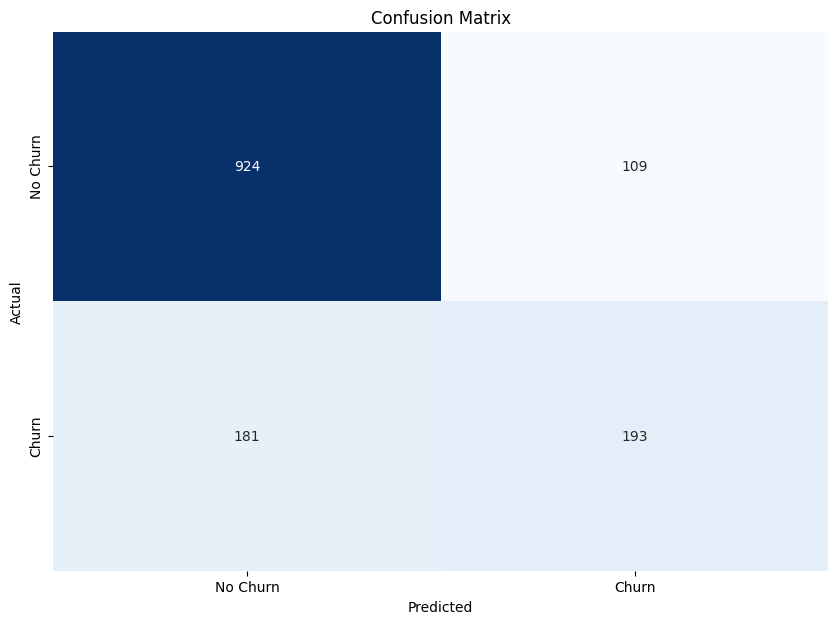

In [56]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Guardar Modelo en Pickle

In [59]:
# Guardar el mejor modelo encontrado por GridSearchCV en un archivo pickle
best_model = grid.best_estimator_

# Ruta del modelo
model_filename = 'gradient_boosting_model.pkl'

# Guardar el modelo en un archivo pickle
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Modelo guardado en {model_filename}")

# Para cargar el modelo desde el archivo pickle
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Usar `loaded_model` para hacer predicciones
y_pred_loaded_model = loaded_model.predict(X_test)

# Evaluar el modelo cargado
accuracy_loaded_model = accuracy_score(y_test, y_pred_loaded_model)
print(f'Accuracy del modelo cargado: {accuracy_loaded_model:.2f}')

Modelo guardado en gradient_boosting_model.pkl
Accuracy del modelo cargado: 0.79
